<a href="https://colab.research.google.com/github/chetansawant462/Computer_Vision_Iot_TSF/blob/main/TSF_Object_Detection_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Spark Foundation
## Task 1: Implement an object detector which identifies the classes of the objects in an image or video.
### Name: CHETAN VASANT SAWANT
### IoT and Computer Vision Intern

In [ ]:
# Importing the Modules 
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import pathlib

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

In [ ]:
# Importing object_detection files
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1
# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
# Defining the function load_model
def load_model(model_name):
  base_url = 'http://download.tensorflow.org/models/object_detection/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(
    fname=model_name, 
    origin=base_url + model_file,
    untar=True)
  model_dir = pathlib.Path(model_dir)/"saved_model"
  model = tf.saved_model.load(str(model_dir))
  model = model.signatures['serving_default']
  return model

In [ ]:
# Loading Label_map for listing strings and labelling each box 
PATH_TO_LABELS = 'C:/Users/anuja/Desktop/demo/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
# Adding Path to the image to test
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('C:/Users/anuja/Desktop/task1/models/research/object_detection/test_images')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[WindowsPath('C:/Users/anuja/Desktop/task1/models/research/object_detection/test_images/image1.jpg'),
 WindowsPath('C:/Users/anuja/Desktop/task1/models/research/object_detection/test_images/image2.jpg'),
 WindowsPath('C:/Users/anuja/Desktop/task1/models/research/object_detection/test_images/image3.jpg'),
 WindowsPath('C:/Users/anuja/Desktop/task1/models/research/object_detection/test_images/image4.jpg'),
 WindowsPath('C:/Users/anuja/Desktop/task1/models/research/object_detection/test_images/image5.jpg')]

In [ ]:
# loading Object Detection Model
model_name = 'ssd_mobilenet_v1_coco_2017_11_17'
detection_model = load_model(model_name)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
# To print models input Signature
print(detection_model.inputs)

[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]


In [ ]:
detection_model.output_dtypes

{'detection_boxes': tf.float32,
 'detection_scores': tf.float32,
 'detection_classes': tf.float32,
 'num_detections': tf.float32}

In [ ]:
detection_model.output_shapes

{'detection_boxes': TensorShape([None, 100, 4]),
 'detection_scores': TensorShape([None, 100]),
 'detection_classes': TensorShape([None, 100]),
 'num_detections': TensorShape([None])}

In [ ]:
# Defining a Function with Model and Image Arguments
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # Converting input image to tensor using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # Adding an axis with `tf.newaxis`
  input_tensor = input_tensor[tf.newaxis,...]

  # Runing inference
  output_dict = model(input_tensor)

  # Convert to numpy arrays 
  # Take index [0] to remove the batch dimension.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)  
  return output_dict

In [ ]:
def show_inference_img(model, image_path):
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=2,min_score_thresh=0.2)

  display(Image.fromarray(image_np))

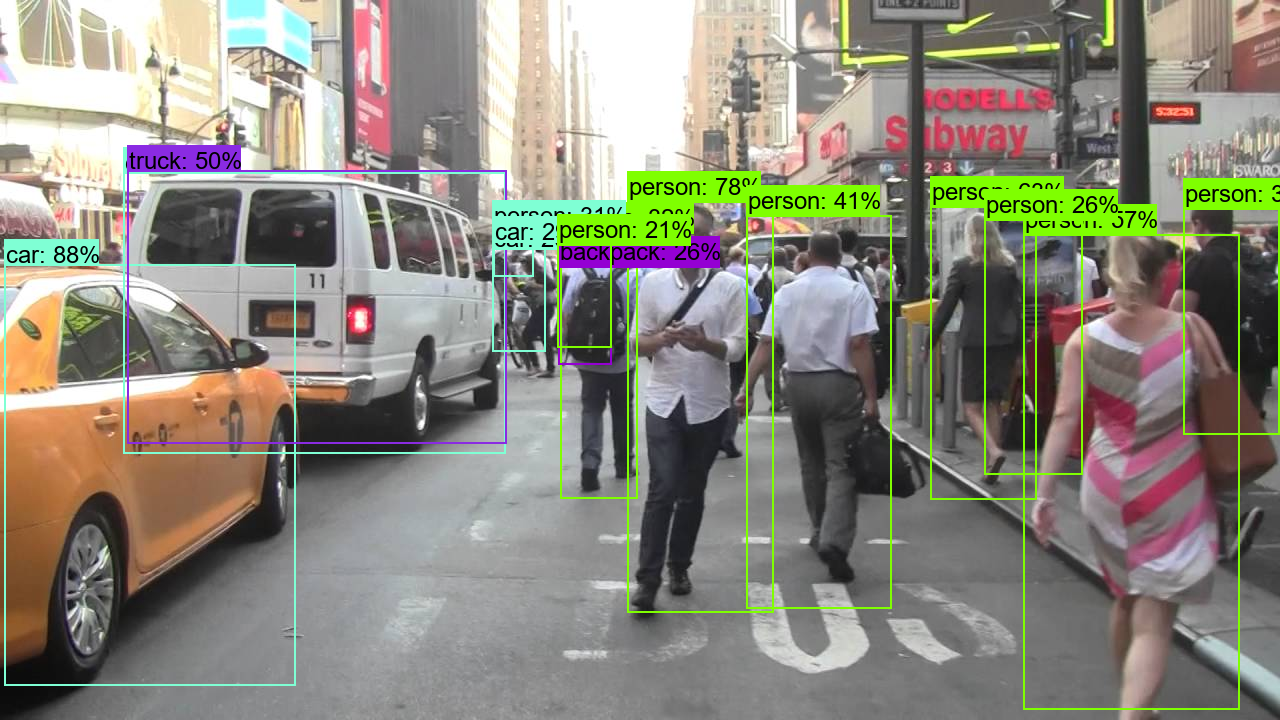

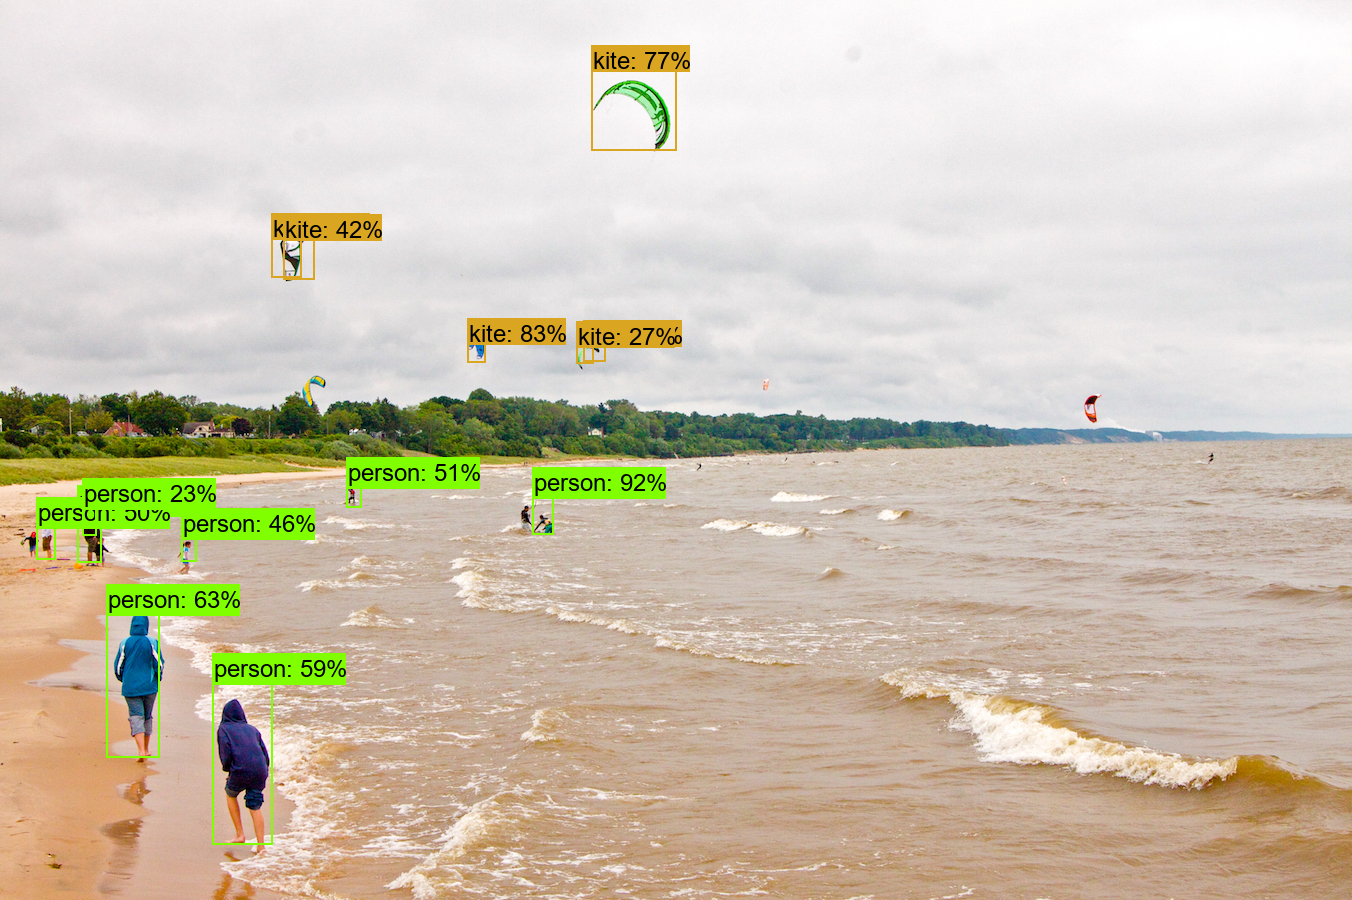

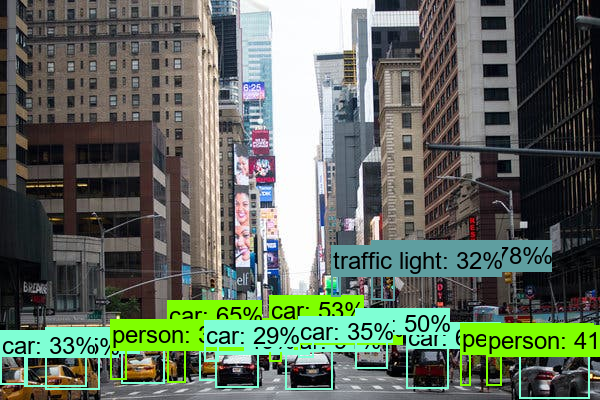

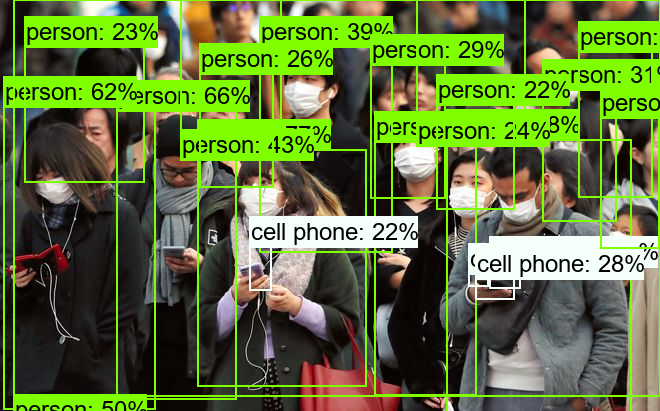

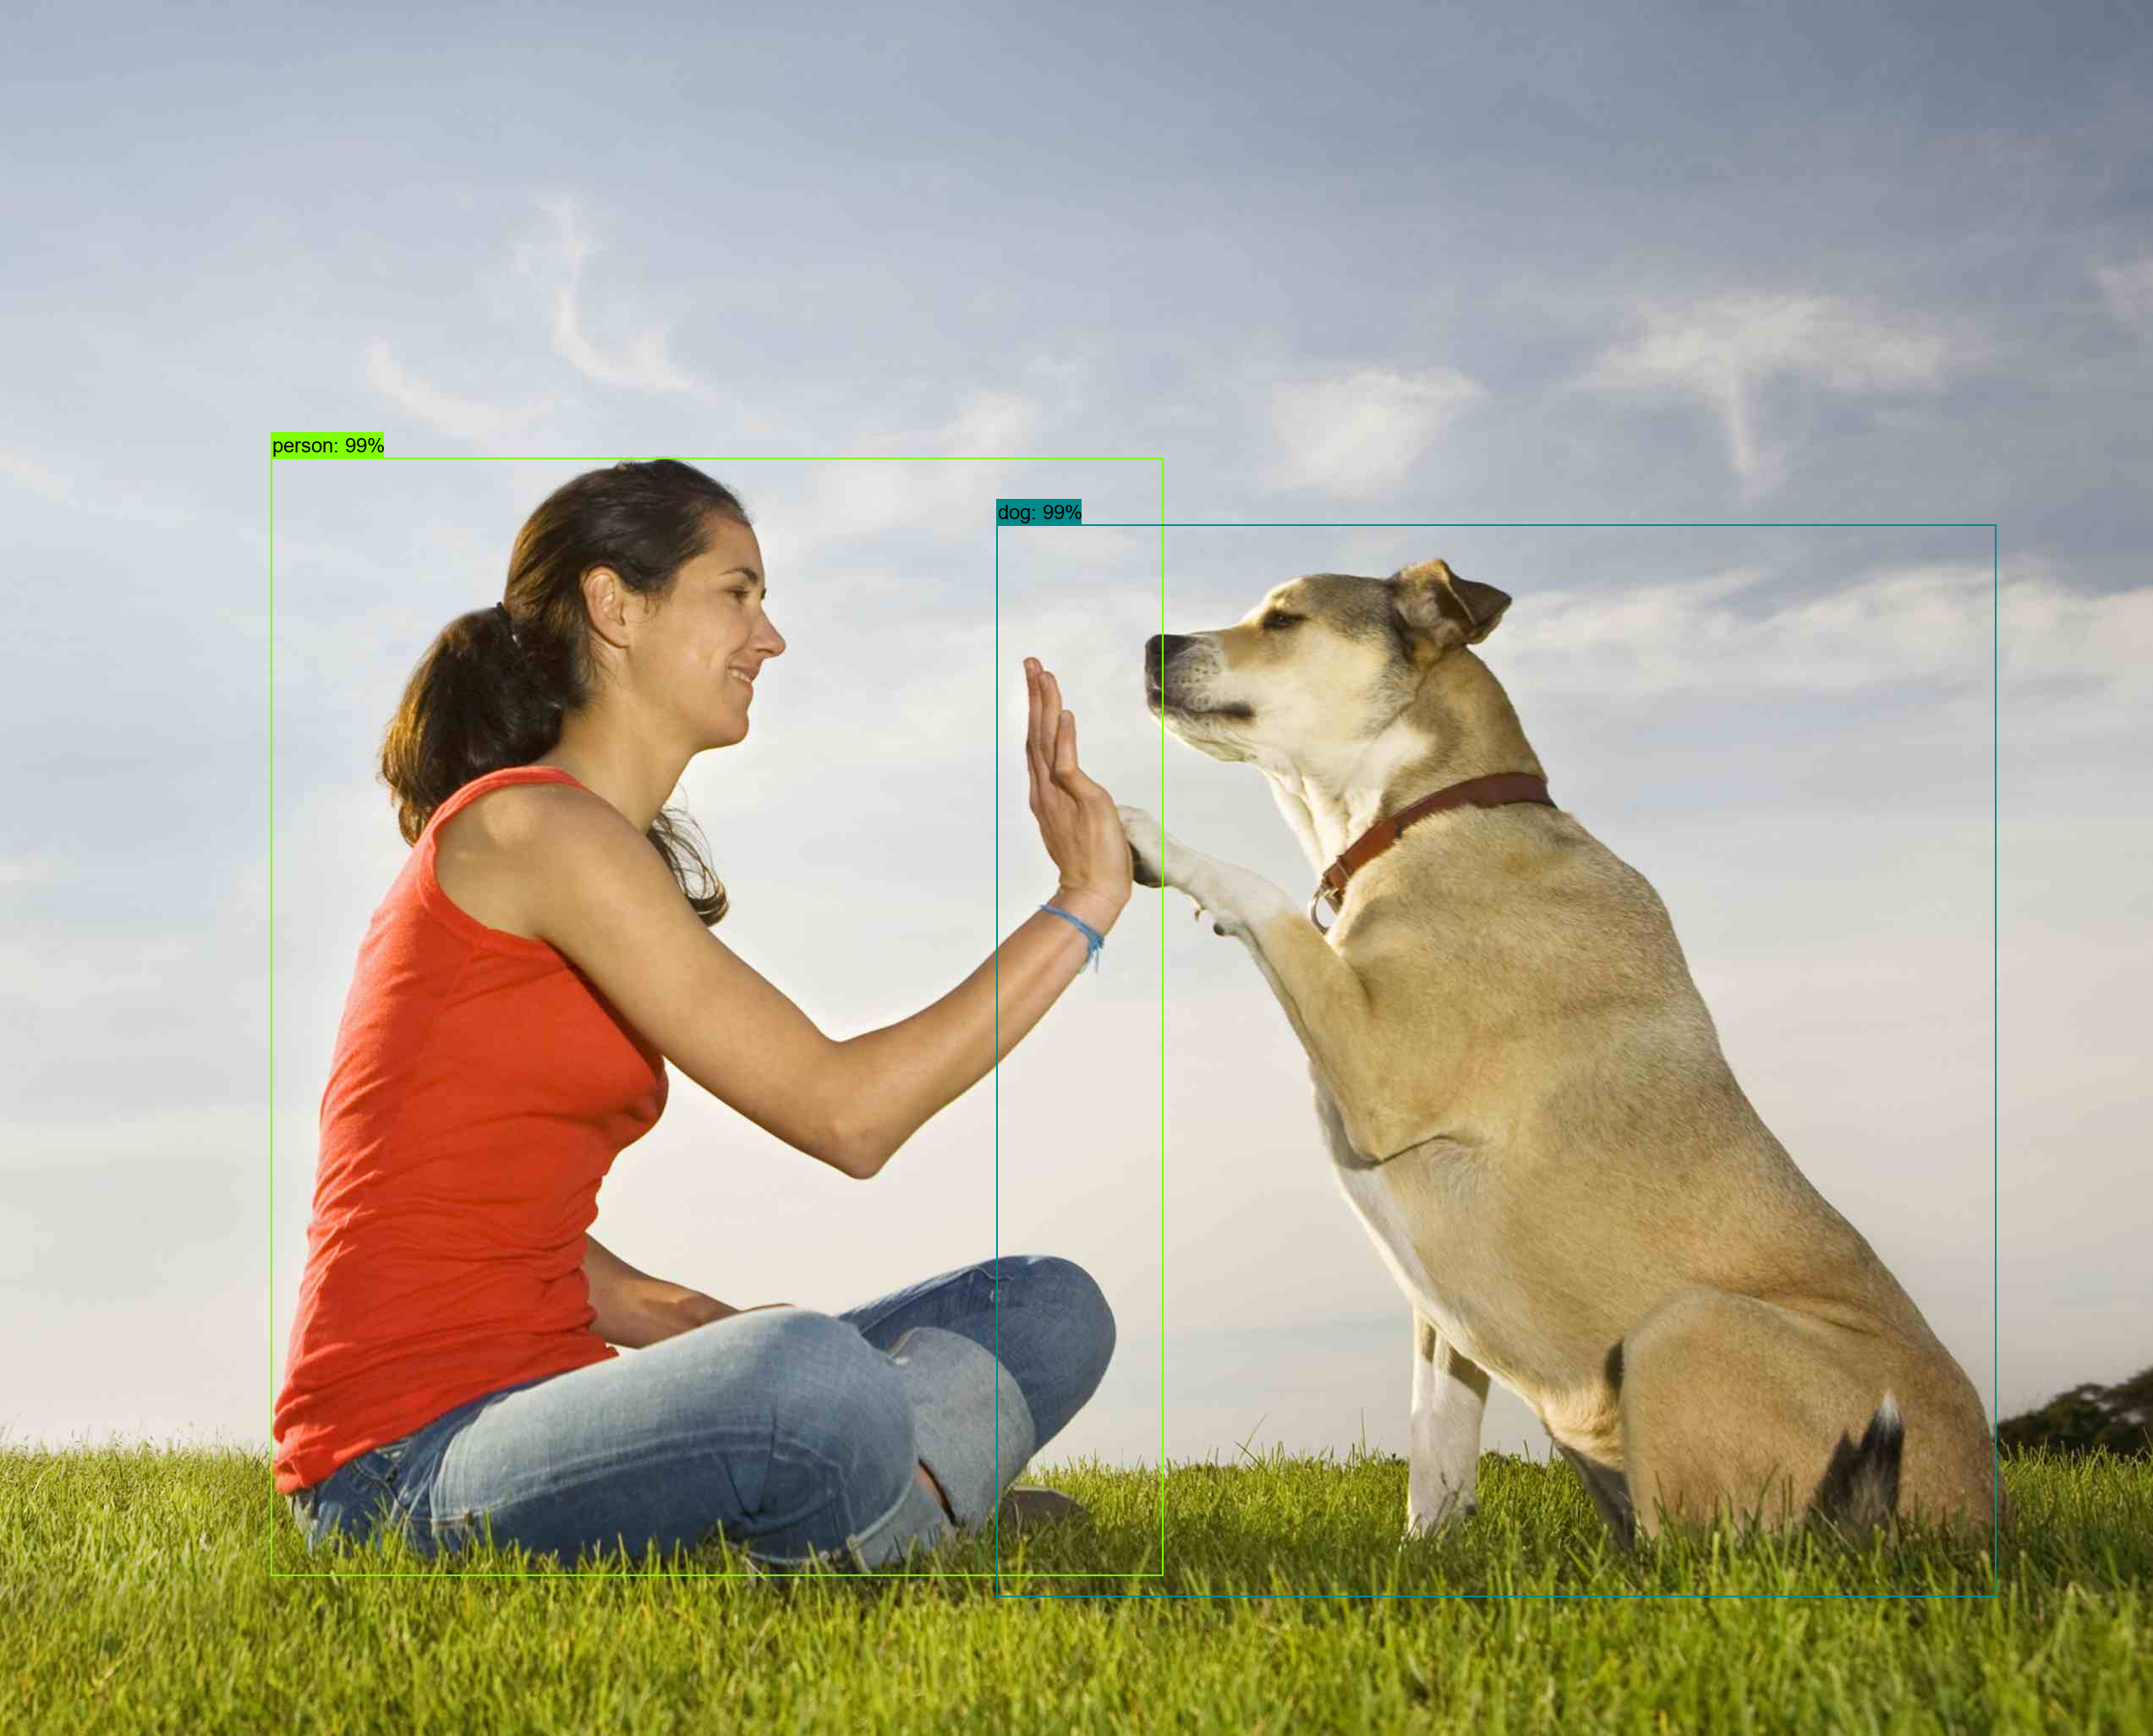

In [ ]:
for image_path in TEST_IMAGE_PATHS:
  show_inference_img(detection_model, image_path)

In [ ]:
from datetime import datetime

def video_detect(image,classes,score,boxes):
    
    for i in range(10):
        if(classes[i]==2 and score[i]>0.8):
            
            h,w=image.shape[0:2]
            #image.shape=[height,width,3]
            
            ymin,xmin,ymax,xmax=boxes[i]

            now = datetime.now()
            dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
            
            center=(int(((xmin+xmax)/2)*w),int(((ymin+ymax)/2)*h))
            cv2.circle(image,center,10,(0,0,255),-1)
            
            file_name=os.path.join('E:/TEST/',dt_string+'.jpg')
            cv2.imwrite(file_name,image)

In [ ]:
def show_inference(model, image_path):
  # result image with boxes and labels on it.
  image_np = image_path
  image_np=cv2.cvtColor(image_np,cv2.COLOR_BGR2RGB)
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=2)
  image_np=cv2.cvtColor(image_np,cv2.COLOR_BGR2RGB)
  video_detect(image_np,output_dict['detection_classes'],output_dict['detection_scores'],output_dict['detection_boxes'])
  return image_np

In [ ]:
import cv2

video=cv2.VideoCapture(r'C:/Users/anuja/Desktop/demo/funny_dog.mp4')

while(True):
    ret,img=video.read()
    img=show_inference(detection_model,img)
    cv2.imshow('LIVE',img)
    e=cv2.waitKey(1)
    
    if(e==27):
        break
cv2.destroyAllWindows()